Sherly Santiadi (2072025)

# Prepare Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path="/content/drive/My Drive/praktikum-ml/CC GENERAL.csv"

Mounted at /content/drive


# Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

# EDA

In [ ]:
df=pd.read_csv(path)
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


There is 8950 instances with 18 features

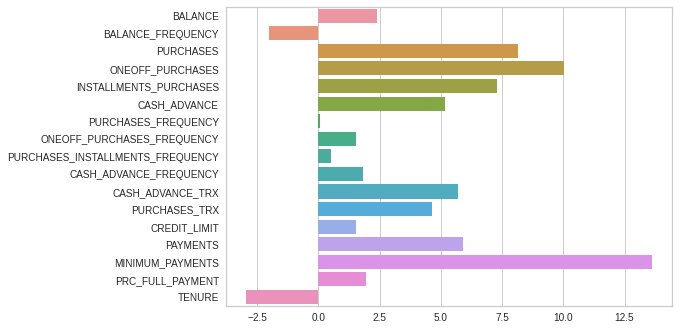

In [ ]:
X = df.drop('CUST_ID', axis=1)
X_drop = X.skew()
sns.barplot(x=X_drop.values, y=X_drop.index)

I will drop CUST_ID : customer id since customer id won't affect any predictions

Text(0.5, 1.0, 'Correlation between different fearures')

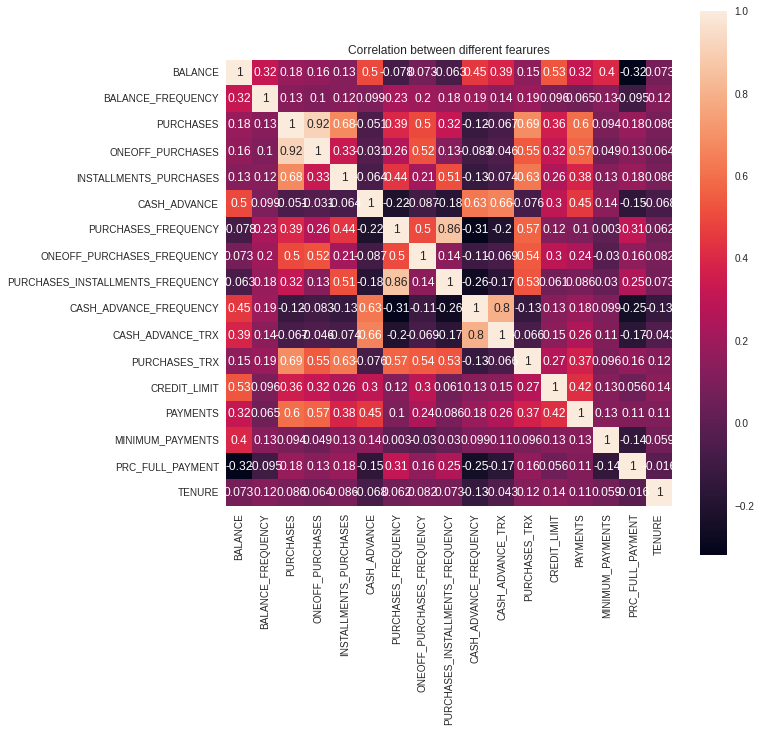

In [ ]:
correlation = X.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True)
plt.title('Correlation between different fearures')

## Info

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

There is no problem about data type since CUST_ID had already removed from the dataset

## Null Data

In [ ]:
null_data=df.isna().sum()
null_data

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We need to handle this null problem

## Remove Outlier

In [ ]:
for column in X.columns:
    data = X[column]
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
 
    outliers = ((data < minimum) |(data > maximum))
    X[column].loc[outliers] = np.nan
    
X.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


BALANCE                              695
BALANCE_FREQUENCY                   1493
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
CREDIT_LIMIT                         249
PAYMENTS                             808
MINIMUM_PAYMENTS                    1154
PRC_FULL_PAYMENT                    1474
TENURE                              1366
dtype: int64

I had remove outlier since K-Means counts distance which means dataset shouldn't have any outliers

## Handle the Missing Value

In [ ]:
imputer = KNNImputer()
imp_data = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
imp_data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Standardization

In [ ]:
std_imp_data = pd.DataFrame(StandardScaler().fit_transform(imp_data), columns=imp_data.columns)
std_imp_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8950.0
mean,-4.605627e-16,3.659946e-15,-2.328256e-15,6.933002e-15,6.606261e-16,6.773725e-16,-3.716084e-16,-3.818820e-15,2.353921e-16,-1.010092e-15,-5.067734e-16,-3.808350e-15,1.202775e-15,7.209131e-16,2.984453e-16,1.206577e-15,0.0
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,0.0
min,-9.705424e-01,-4.155613e+00,-9.108903e-01,-6.680081e-01,-7.877010e-01,-6.489617e-01,-1.221758e+00,-7.445069e-01,-9.169952e-01,-7.471386e-01,-6.816397e-01,-9.664333e-01,-1.365341e+00,-1.191788e+00,-1.158651e+00,-4.496321e-01,0.0
25%,-8.698460e-01,3.667368e-01,-8.520893e-01,-6.680081e-01,-7.877010e-01,-6.489617e-01,-1.014125e+00,-7.445069e-01,-9.169952e-01,-7.471386e-01,-6.816397e-01,-8.736430e-01,-8.652070e-01,-8.090585e-01,-7.803749e-01,-4.496321e-01,0.0
50%,-2.885189e-01,3.667368e-01,-3.756604e-01,-5.869491e-01,-4.754999e-01,-6.489617e-01,2.404259e-02,-3.779420e-01,-4.976286e-01,-7.471386e-01,-6.816397e-01,-3.169012e-01,-4.134727e-01,-3.372088e-01,-4.243546e-01,-4.496321e-01,0.0
75%,5.627647e-01,3.667368e-01,6.123033e-01,3.670389e-01,5.317870e-01,5.418314e-01,1.062211e+00,4.285057e-01,9.701506e-01,4.369621e-01,4.783904e-01,6.110018e-01,6.513295e-01,6.760408e-01,6.364204e-01,-2.118974e-01,0.0
max,2.909891e+00,3.667368e-01,3.121026e+00,3.512621e+00,3.318234e+00,3.338116e+00,1.269843e+00,2.554590e+00,1.599199e+00,3.128095e+00,3.185127e+00,2.837969e+00,3.006801e+00,2.979580e+00,2.850882e+00,4.305075e+00,0.0


I need to do standardized since K-means depents on distance (dataset should be in the same range)

## Unique Data

In [ ]:
X.nunique()

BALANCE                             8176
BALANCE_FREQUENCY                     12
PURCHASES                           5395
ONEOFF_PURCHASES                    3008
INSTALLMENTS_PURCHASES              3603
CASH_ADVANCE                        3293
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            36
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                25
CASH_ADVANCE_TRX                      11
PURCHASES_TRX                         42
CREDIT_LIMIT                         180
PAYMENTS                            7903
MINIMUM_PAYMENTS                    7795
PRC_FULL_PAYMENT                      16
TENURE                                 1
dtype: int64

## Describe Data

In [ ]:
X.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8255.000000,7457.000000,8142.000000,7937.000000,8083.000000,7920.000000,8950.000000,8168.000000,8950.000000,8425.000000,8146.000000,8184.000000,8701.000000,8142.000000,7796.000000,7476.000000,7584.0
mean,1091.425911,0.973505,540.783778,215.349273,201.579467,397.791343,0.490351,0.130659,0.364437,0.099297,1.631353,8.874267,4150.497429,1066.156064,441.951518,0.034005,12.0
std,1187.863991,0.065186,650.534386,353.064544,287.467188,686.323822,0.401371,0.195206,0.397448,0.139509,2.557910,9.882529,3028.199386,952.121712,406.959078,0.076184,0.0
min,0.000000,0.727273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,12.0
25%,104.442042,1.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,349.844563,163.447863,0.000000,12.0
50%,716.017731,1.000000,289.950000,0.000000,34.520000,0.000000,0.500000,0.000000,0.166667,0.000000,0.000000,6.000000,3000.000000,737.923499,260.304996,0.000000,12.0
75%,1647.660918,1.000000,819.035000,302.050000,328.040000,508.614312,0.916667,0.166667,0.750000,0.166667,2.000000,13.000000,6000.000000,1501.768395,615.940711,0.000000,12.0
max,4940.113918,1.000000,2711.900000,1443.330000,1170.490000,2784.294727,1.000000,0.750000,1.000000,0.545455,10.000000,41.000000,13600.000000,4177.324826,1809.974326,0.333333,12.0


# Dimensionality Reduction

I'll do dimensionality reduction since K-means only prosecute in 2 features

In [ ]:
pca = PCA(n_components=0.9, random_state=42)
pca.fit(std_imp_data)
PC_names = ['PC'+str(x) for x in range(1,len(pca.components_)+1)]
pca_data = pd.DataFrame(pca.transform(std_imp_data), columns=PC_names)

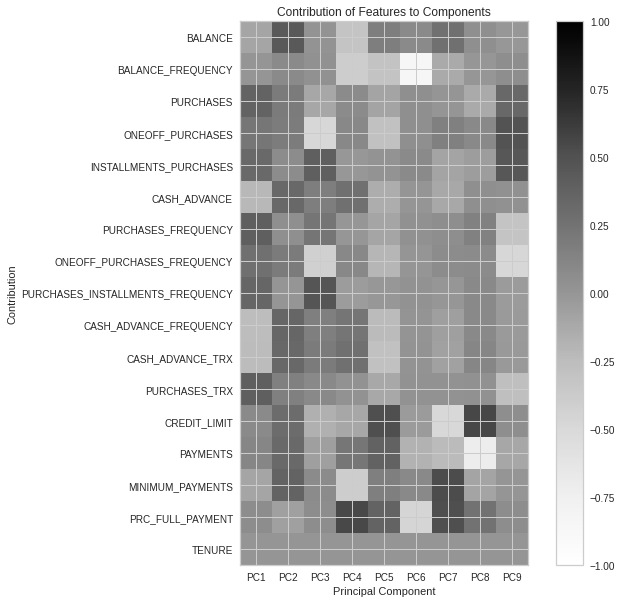

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(pca.components_.T,
           vmin=-1,
           vmax=1,
          )
plt.yticks(range(len(std_imp_data.columns)), std_imp_data.columns)
plt.xticks(range(len(pca_data.columns)), pca_data.columns)
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.colorbar()

# Find n_cluster

## Elbow Method

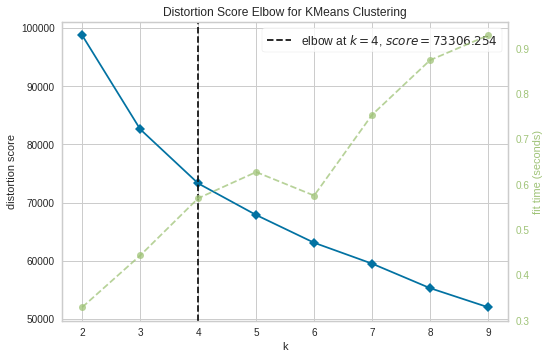

In [ ]:
model = KMeans(random_state=42)
kmeans_elbow = KElbowVisualizer(model, k=(2,10))
kmeans_elbow.fit(pca_data)       
kmeans_elbow.show()       

In [ ]:
kmeans_elbow.elbow_value_

4

Best value when cluster = 4

## Inertia

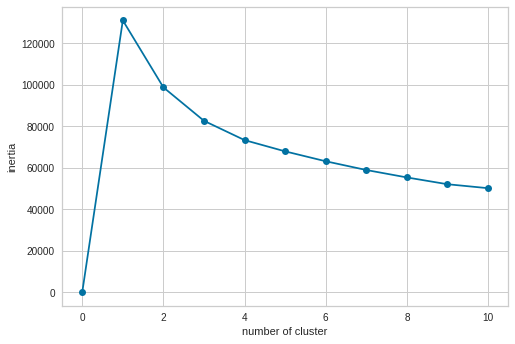

In [ ]:
inertia_list = np.empty(11)
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(pca_data)
  inertia_list[i] = kmeans.inertia_
plt.plot(range(0,11),inertia_list,'-o')
plt.xlabel('number of cluster')
plt.ylabel('inertia')
plt.show()

# Model

In [ ]:
X = df[['BALANCE','PURCHASES']].to_numpy()

In [ ]:
km = KMeans(n_clusters = 4,init ='k-means++', max_iter=300,random_state=42)
km.fit(X)
y_balance_pred = km.predict(X)

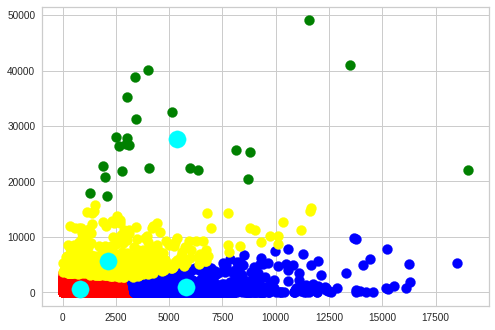

In [ ]:
plt.scatter(X[y_balance_pred==0, 0], X[y_balance_pred==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_balance_pred==1, 0], X[y_balance_pred==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_balance_pred==2, 0], X[y_balance_pred==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_balance_pred==3, 0], X[y_balance_pred==3, 1], s=100, c='yellow', label ='Cluster 4')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='cyan', label = 'Centroids')
plt.show()

I'll use standardized dataset because in the previous plot is still unclear

In [ ]:
X = std_imp_data[['BALANCE','PURCHASES']].to_numpy()

In [ ]:
km = KMeans(n_clusters = 4,init ='k-means++', max_iter=300,random_state=42)
km.fit(X)
y_balance_pred = km.predict(X)

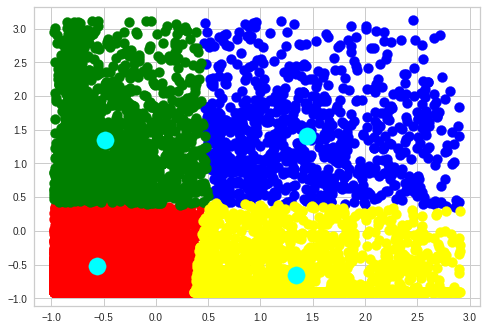

In [ ]:
plt.scatter(X[y_balance_pred==0, 0], X[y_balance_pred==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_balance_pred==1, 0], X[y_balance_pred==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_balance_pred==2, 0], X[y_balance_pred==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_balance_pred==3, 0], X[y_balance_pred==3, 1], s=100, c='yellow', label ='Cluster 4')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='cyan', label = 'Centroids')
plt.show()

# Conclusion


*   We need to do standardization
*   We need to preprocessing dataset by input the null value, remove outlier
*   We can find optimum n_cluster using two techniques; first elbow method or inertia
*   After using n_cluster = 4 dataset fit perfectly into each cluster divided by decision boundary

